# 1. Introduction  
INFO 250 Project 2 by <big>Team 3</big>

<div style="float:left; width:45%; margin-right:20px;">
<table>
<tr><th>Name</th><th>Student ID</th><th>Email</th><th>Role</th></tr>
<tr><td>Weixin Kong</td><td>320230941990</td><td>kongwx2023@lzu.edu.cn</td><td>leader</td></tr>
<tr><td>Yinuo Sun</td><td>320230942370</td><td>sunyn2023@lzu.edu.cn</td><td></td></tr>
<tr><td>Shiqi Wang</td><td>320230942440</td><td>wshiqi2023@lzu.edu.cn</td><td></td></tr>
<tr><td>Junchen Zhou</td><td>320230942790</td><td>zhoujch2023@lzu.edu.cn</td><td></td></tr>
</table>
</div>

<div style="clear:both;"></div>


**This project replicates and improves a public visualization of carbon emission drivers in the Yellow River Basin.**  
We evaluate the original design using key principles of information visualization, including **data-ink ratio, cognitive load, and visual encoding consistency**.

Based on this analysis, we implement a series of **code-level visual improvements using Python and Matplotlib**.  
Our goal is to **enhance clarity, fairness, and interpretability** while maintaining faithful representation of the original data.



# 2. Replicate of the Original Graph

### Image Selection
- Chart link: https://www.nature.com/articles/s41598-023-40998-6/figures/1
- Chart source (journal link): https://www.nature.com/articles/s41598-023-40998-6

### Original Visualization Replication

Since the data used to draw the chart is not given in the Report, we take the data directly from the chart.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import base64

In [3]:
# Time periods (2005-2020 biannual intervals)
years = [
    "2005-2006", "2006-2007", "2007-2008", "2008-2009", "2009-2010",
    "2010-2011", "2011-2012", "2012-2013", "2013-2014", "2014-2015",
    "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020"
]

# Decomposition contribution data (rows: years, columns: factors)
contribution_data = np.array([
    [200, 0, 450, -570, 50, 1300],
    [1200, 0, 900, -620, 200, 1050],
    [-450, 0, 1320, -120, 50, 1400],
    [-130, 200, 300, -480, 70, 560],
    [150, 0, 400, -340, 200, 1000],
    [50, 10, 450, 10, 200, 1150],
    [-140, 0, 700, 420, 100, 1250],
    [-200, -10, 980, -190, 250, 950],
    [-180, -10, 1000, -140, 150, 1200],
    [0, 0, 500, 910, 10, 1100],
    [-280, -5, 430, 80, 270, 800],
    [-590, -140, 700, -110, 200, 1230],
    [-300, -80, 1150, -1200, 160, 750],
    [-160, -110, 720, -720, 100, 1200],
    [0, -110, 520, 920, 300, 1200]
])

# List of decomposition factors (corresponding to data columns)
factors = [
    "Carbon emission coefficient",
    "Energy consumption structure",
    "Energy intensity",
    "Industrial structure effect",
    "Economic activity scale",
    "Population scale"
]

Saved: Original image.html (embedded SVG)


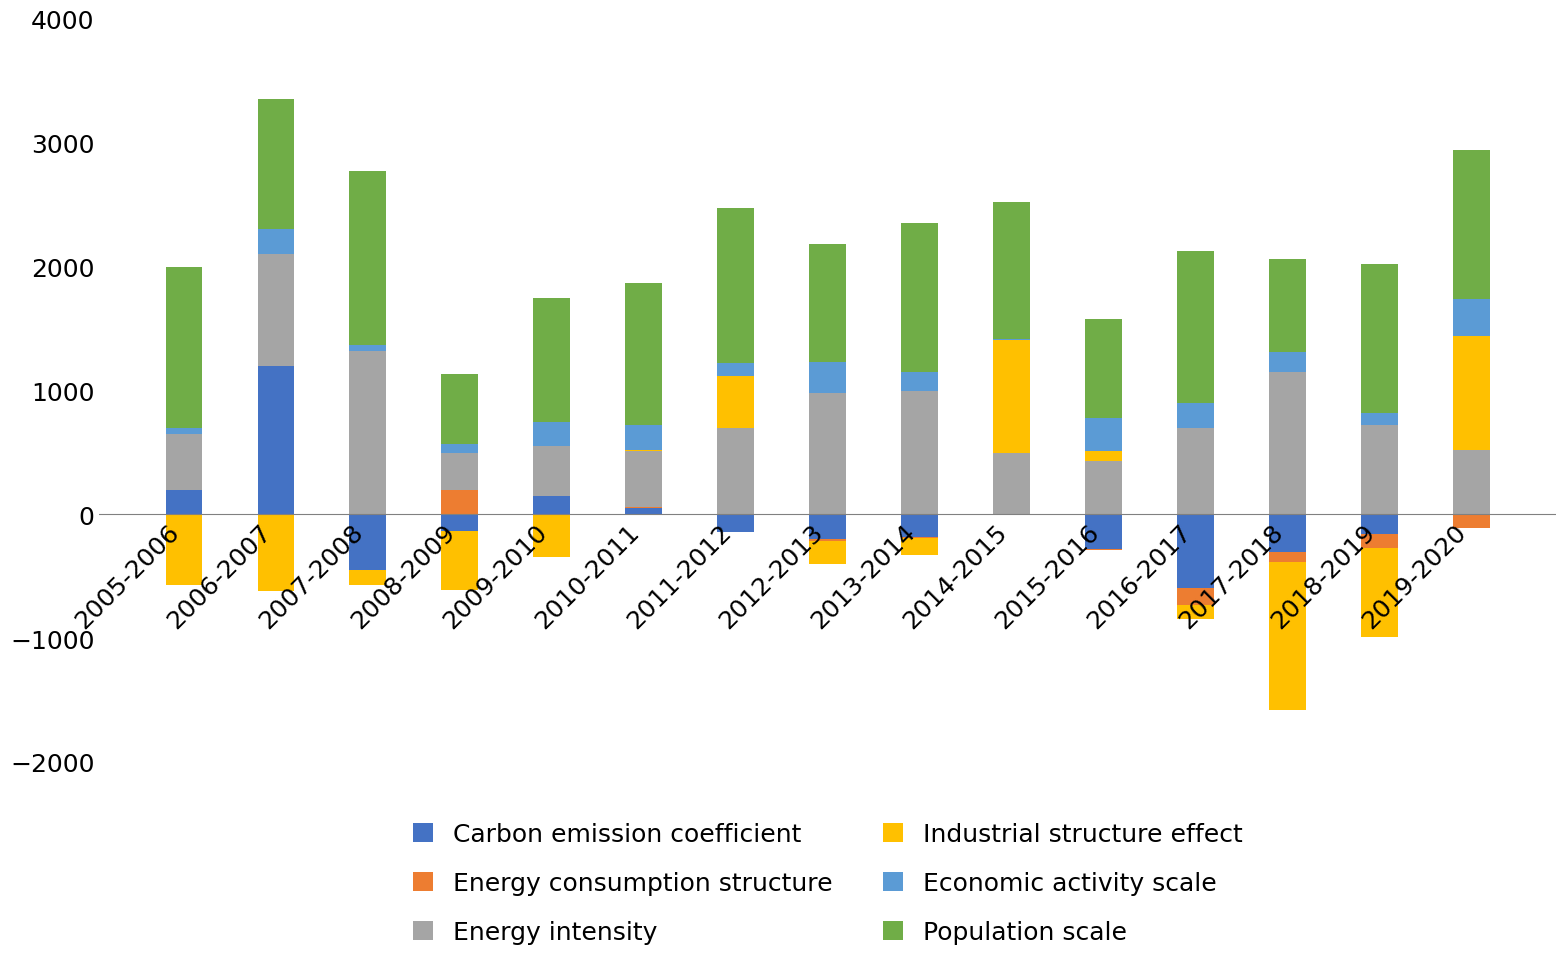

In [56]:
# Color palette
colors = ["#4472C4", "#ED7D31", "#A5A5A5", 
          "#FFC000", "#5B9BD5", "#70AD47"]

# Create figure
plt.figure(figsize=(16, 10))
plt.rcParams.update({'font.size': 18})

x = np.arange(len(years))
data_T = contribution_data.T

# Initialize bottom values for positive and negative stacking
bottom_pos = np.zeros(len(years))
bottom_neg = np.zeros(len(years))
bars = []

# Stacked bar plotting loop
for i in range(6):
    vals = data_T[i]
    pos = np.where(vals > 0, vals, 0)
    neg = np.where(vals < 0, vals, 0)

    hpos = plt.bar(x, pos, bottom=bottom_pos, color=colors[i], width=0.4)
    hneg = plt.bar(x, neg, bottom=bottom_neg, color=colors[i], width=0.4)

    bottom_pos += pos
    bottom_neg += neg

    bars.append(hpos)

# Add y = 0 baseline
plt.axhline(0, color="gray", linewidth=0.8)

# Set y-axis limits and ticks
plt.ylim(-2000, 4000)
plt.yticks(np.arange(-2000, 4001, 1000))  

# Remove all spines except the x-axis positioned at y=0
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))   
ax.spines['bottom'].set_visible(True)

for spine in ax.spines.values():
    spine.set_visible(False)

# Move x-axis tick labels slightly upward
for tick in ax.get_xticklabels():
    tick.set_y(-3)

# Remove tick marks on both axes
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

# Legend displayed in 3×2 layout below the chart
plt.legend(
    bars, factors,
    ncol=2,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    frameon=False,
    fontsize=18,
    handlelength=0.8,    
    handleheight=0.8,
    labelspacing=1
)

plt.tight_layout()
# Rotate x-axis labels by 45 degrees
plt.xticks(x, years, rotation=45, ha='right')

png_path = "Original image.svg"
plt.savefig(png_path, dpi=300, bbox_inches="tight")

with open(png_path, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")

html = f"""
<html><head><meta charset="utf-8"><title>Original image</title></head>
<body style="margin:0;display:flex;justify-content:center;align-items:center;background:white;">
<img src="data:image/png;base64,{b64}" style="max-width:100%;height:auto;">
</body></html>
"""

with open("Original image.html", "w", encoding="utf-8") as f:
    f.write(html)

print("Saved: Original image.html (embedded SVG)")
plt.show()




**This figure shows the decomposition results of the driving factors affecting CO₂ emissions in the Yellow River Basin from 2005 to 2020.**  
Different factors exhibit clearly different impacts on carbon emission changes over time.

Overall, the **population scale effect, energy intensity effect, and economic activity scale effect remain positive**, indicating that they are the main forces driving the growth of carbon emissions. Among them, the **population scale effect plays the most dominant role**. The **energy intensity effect staying positive** suggests relatively low energy-use efficiency, and the **economic activity scale effect reflects the strong link between economic growth and emissions**.

In contrast, the **carbon emission coefficient effect and industrial structure effect are mostly negative**, indicating their inhibiting roles. The **energy consumption structure effect gradually shifts from positive to negative**, showing that energy structure optimization has started to reduce emissions.

**However, the original visualization has several limitations.**  
Positive and negative effects are mixed in a single stacked bar chart, which causes visual interference and makes it difficult to compare opposite forces. The axis labeling and color encoding are also not sufficiently intuitive, increasing cognitive load for readers. These issues may reduce the clarity and interpretability of the original figure.


# 3. Improved Visualization

### 3.1 Axis Design, Stacking Method, and Legend Placement Improvements

This section presents the enhanced **stacked bar visualization** showing **positive and negative contributions** of key drivers to carbon emission changes.

- **Canvas size and title** optimized for improved **readability**.  
- **Positive and negative values** stacked independently to prevent **visual distortion**; **y-axis scale** adjusted to maintain **numerical proportionality**.  
- To maintain a good **data-ink ratio** and reduce **cognitive load** : We have added missing axis titles, placed horizontal axis labels at the bottom of the image, and positioned the **legend** in the **upper right corner** for better **readability**.


Saved: Initial improvement image.html (embedded SVG)


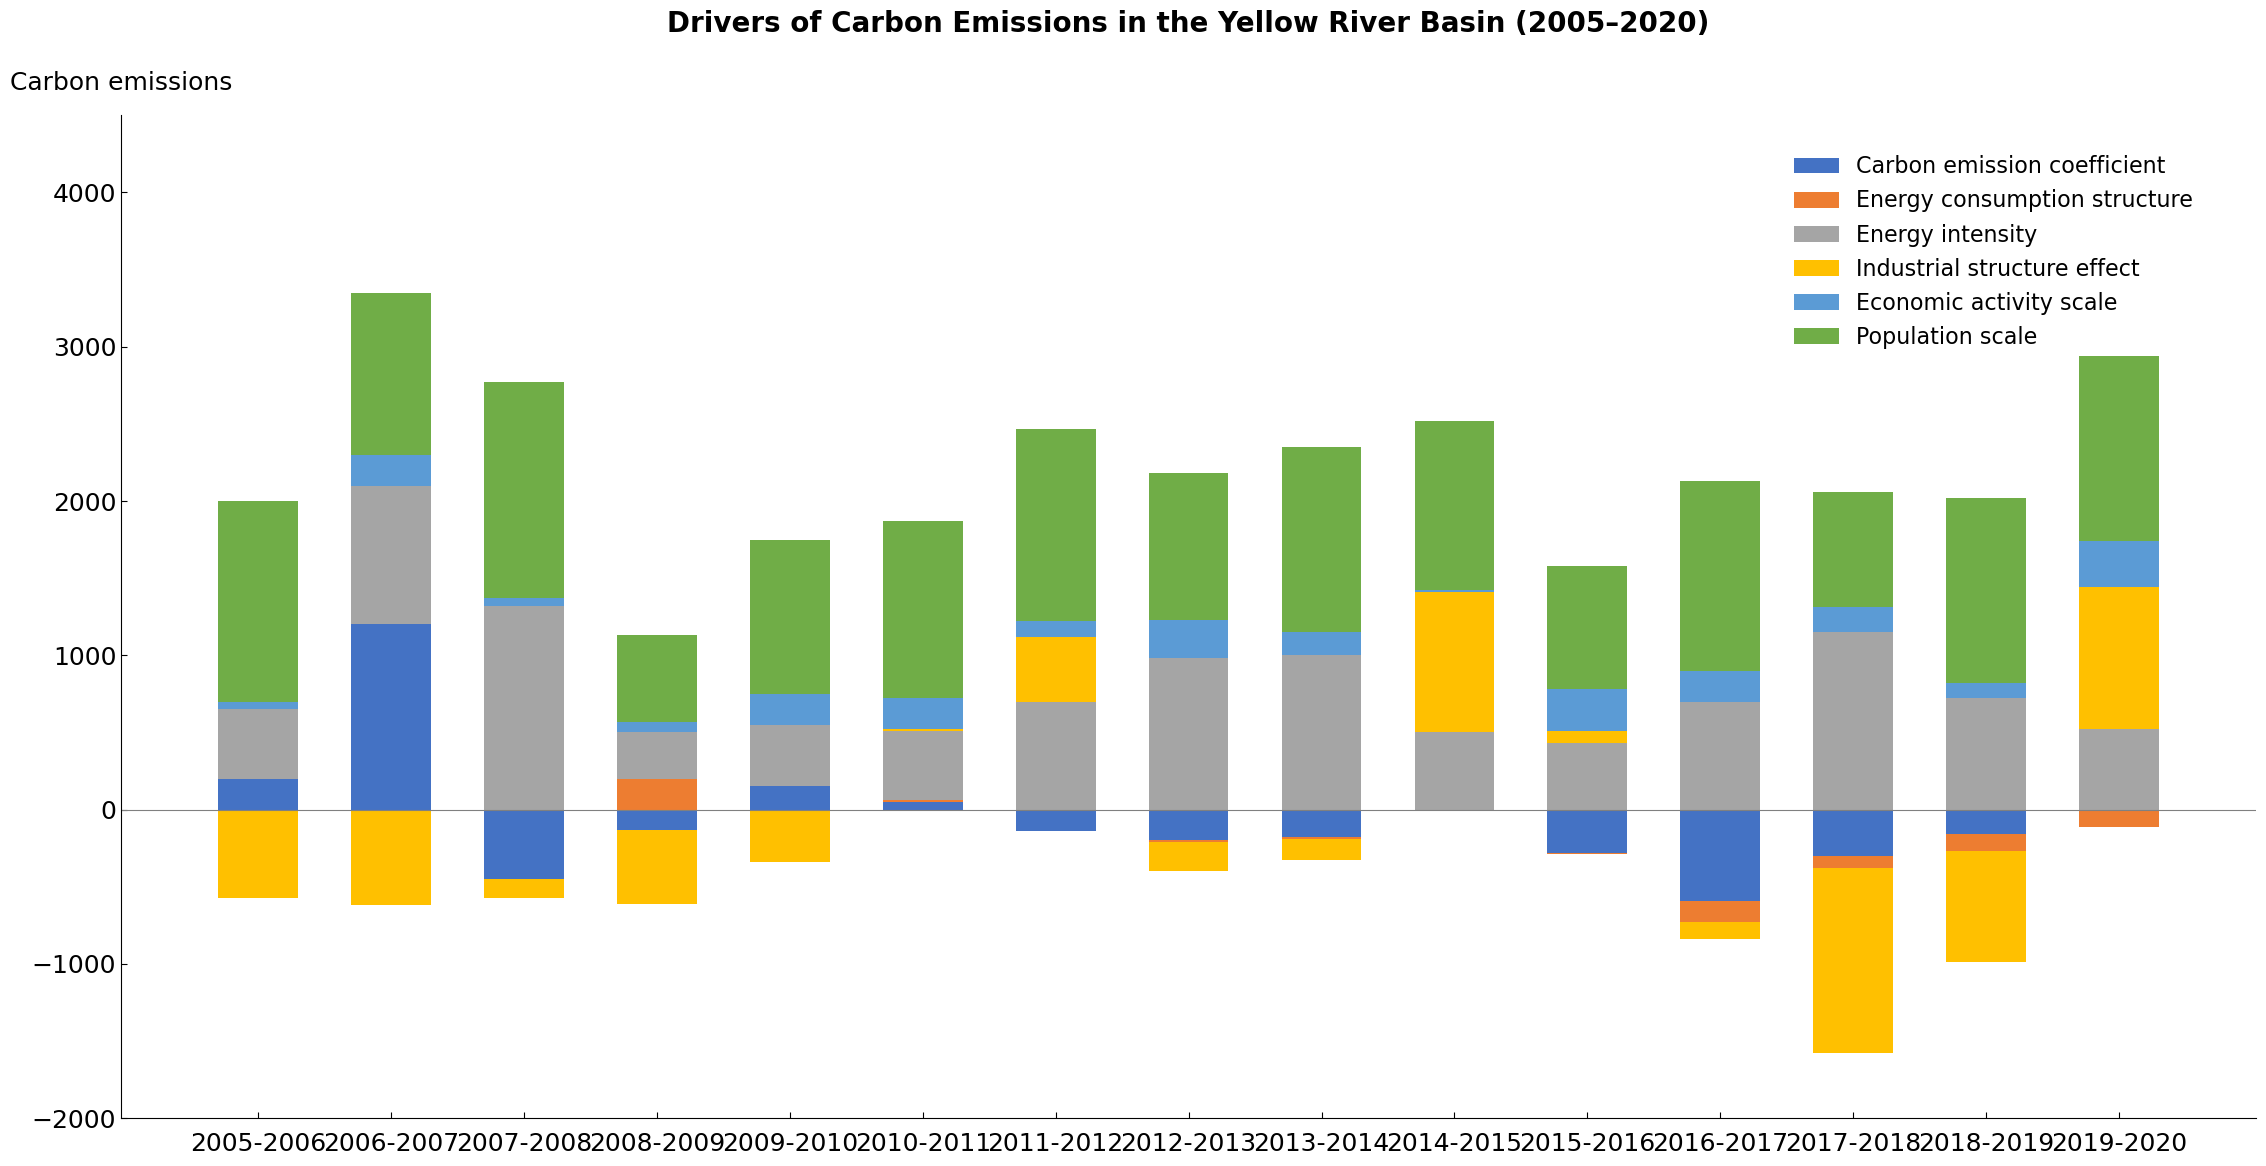

In [57]:
# Plot 1: Matplotlib Stacked Bar Chart (Positive/Negative Contribution)
mpl_colors = ["#4472C4", "#ED7D31", "#A5A5A5", "#FFC000", "#5B9BD5", "#70AD47"]

# Set figure size and font properties
plt.figure(figsize=(23, 12))
plt.rcParams.update({'font.size': 18})

# Title and axis label
plt.title(
    'Drivers of Carbon Emissions in the Yellow River Basin (2005–2020)',
    fontsize=20, pad=60, fontweight='bold'
)
plt.ylabel('Carbon emissions', fontsize=18, labelpad=15)

# Prepare x-axis and transposed data
x_pos = np.arange(len(years))
data_transposed = contribution_data.T

# Initialize stacking baselines
bottom_pos = np.zeros(len(years))
bottom_neg = np.zeros(len(years))
bar_objects = []

# Plot stacked bars for each factor
for i in range(len(factors)):
    values = data_transposed[i]
    pos_vals = np.where(values > 0, values, 0)
    neg_vals = np.where(values < 0, values, 0)

    bar_pos = plt.bar(x_pos, pos_vals, bottom=bottom_pos, color=mpl_colors[i], width=0.6)
    bar_neg = plt.bar(x_pos, neg_vals, bottom=bottom_neg, color=mpl_colors[i], width=0.6)

    bottom_pos += pos_vals
    bottom_neg += neg_vals
    bar_objects.append(bar_pos)

# X-axis configuration
plt.xticks(x_pos, years, rotation=45, ha='right', fontsize=17)

# Baseline at y=0
plt.axhline(0, color="gray", linewidth=0.8)

# Y-axis range and ticks
plt.ylim(-2000, 4500)
ax = plt.gca()
ax.set_yticks(np.arange(-2000, 4501, 1000))

# Spine and tick configuration
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('axes', 0))

for tick in ax.get_xticklabels():
    tick.set_y(-0.08)
ax.tick_params(axis='x', which='both', length=4, width=0.8, pad=10, direction='in')
ax.tick_params(axis='y', which='both', length=4, width=0.8, direction='in')

# Adjust y-axis label position
ax.yaxis.set_label_coords(0, 1.02)
ax.yaxis.label.set_rotation(0)

# Legend
plt.legend(
    bar_objects, factors,
    ncol=1,
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98),
    frameon=False,
    fontsize=16
)

# Layout and display
plt.tight_layout()

png_path = "Initial improvement image.svg"
plt.savefig(png_path, dpi=300, bbox_inches="tight")

with open(png_path, "rb") as f:
    b64 = base64.b64encode(f.read()).decode("utf-8")

html = f"""
<html><head><meta charset="utf-8"><title>Original image</title></head>
<body style="margin:0;display:flex;justify-content:center;align-items:center;background:white;">
<img src="data:image/png;base64,{b64}" style="max-width:100%;height:auto;">
</body></html>
"""

with open("Initial improvement image.html", "w", encoding="utf-8") as f:
    f.write(html)

print("Saved: Initial improvement image.html (embedded SVG)")
plt.show()

## 3.2 Improved Visualization 1: Interactive Scatter Plot
This interactive scatter plot displays the contribution value of each driver in each period as an independent point, making it easier to compare the magnitude and direction of individual factor impacts across years.


In [58]:
scatter_colors = ['#427AB2', '#C8E3D6', '#F3D9E2', '#FFF5B3', '#EFA97A', '#D0E9FF']


# Total contribution per year
total_per_year = contribution_data.sum(axis=1)

# X positions with gap for readability
gap = 1.8
x_pos = np.arange(len(years)) * gap

# Create figure
fig = go.Figure()

# Scatter + line for each factor
for i, factor in enumerate(factors):
    fig.add_trace(
        go.Scatter(
            x=x_pos,
            y=contribution_data[:, i],
            mode="markers+lines",
            name=factor,
            marker=dict(
                symbol="square",
                size=20,
                color=scatter_colors[i],
                line=dict(color="black", width=1)
            ),
            line=dict(
                color=f"rgba({int(scatter_colors[i][1:3],16)},"
                      f"{int(scatter_colors[i][3:5],16)},"
                      f"{int(scatter_colors[i][5:7],16)},0.3)",
                width=1
            ),
            text=years,
            customdata=total_per_year,
            hovertemplate=(
                "<b>Year:</b> %{text}<br>"
                "<b>Factor:</b> " + factor + "<br>"
                "<b>Value:</b> %{y}<br>"
                "<b>Total:</b> %{customdata}<extra></extra>"
            )
        )
    )

# Layout configuration
fig.update_layout(
    title=dict(
        text="Interactive Drivers of Carbon Emissions (Yellow River Basin, 2005–2020)",
        x=0.5,
        font=dict(size=22)
    ),

    # x-axis
    xaxis=dict(
        title="Year",
        tickmode="array",
        tickvals=x_pos,
        ticktext=years,
        showline=True,
        linewidth=1.5,      # Slightly thicker axis line
        linecolor="black",
        ticks="outside"
    ),

    # y-axis
    yaxis=dict(
        title="",           # ❗ Disable default y-axis title
        range=[-1500, 1600],
        showline=True,
        linewidth=1.5,
        linecolor="black",
        zeroline=False,
        ticks="outside"
    ),

    # Red dashed baseline
    shapes=[
        dict(
            type="line",
            xref="paper",
            x0=0, x1=1,
            yref="y",
            y0=0, y1=0,
            line=dict(color="red", width=3, dash="dash")
        )
    ],

    # Annotations: y-axis title + baseline arrow
    annotations=[
        # y-axis title at the top
        dict(
            xref="paper",
            yref="paper",
            x=-0.05,
            y=1.05,
            text="Carbon emissions",
            showarrow=False,
            xanchor="left",
            yanchor="bottom",
            font=dict(size=16, color="black")
        ),

        # Baseline arrow + label
        dict(
            xref="paper",
            yref="y",
            x=1.0,
            y=0,
            xanchor="left",
            text="Baseline",
            showarrow=True,
            arrowhead=2,
            arrowwidth=2,
            arrowcolor="red",
            ax=20,
            ay=0,
            font=dict(size=14, color="red")
        )
    ],

    # Legend at bottom-right
    legend=dict(
        title="Factors",
        font=dict(size=14),
        x=0.45,
        y=0.05,
        xanchor="left",
        yanchor="bottom",
        bgcolor="rgba(255,255,255,0.8)",  # Semi-transparent background
    ),

    width=1400,
    height=700,
    plot_bgcolor="white",
    paper_bgcolor="white"
)

# X-axis range (slightly extended)
fig.update_xaxes(
    range=[x_pos[0] - gap * 1.0, x_pos[-1] + gap * 1.0]
)



# Export interactive figure to HTML (everyone can open)
output_html = "interactive_scatter_line.html"

fig.write_html(
    output_html,
    include_plotlyjs=True,  
    full_html=True
)

print(f"Saved interactive HTML to: {output_html}")

# Show plot
fig.show()


Saved interactive HTML to: interactive_scatter_line.html


### Interpretation of the Interactive Scatter Plot
The scatter plot uses distinct colored squares to represent each driver, with the y-axis position indicating the contribution value (positive = promoting emission growth; negative = inhibiting emission growth). Hovering over a point displays detailed information (year, factor, contribution value, and annual total emission change).

This design allows readers to:
- Quickly identify the contribution direction (positive/negative) of each factor in any year.
- Compare the contribution magnitude of the same factor across different years (e.g., the industrial structure effect shifts from slightly negative to highly negative after 2015).
- Avoid visual overlap from stacked bars, improving the clarity of individual factor trends.
- Intuitively grasp outliers (e.g., the sharp increase in the industrial structure effect's negative contribution in 2017–2018).
- To enhance trend continuity, We add connecting lines of the same color series to data points to strengthen trend analysis and improve the efficiency of vertical comparison.
